# Notebook: WalkSAT - Solución del Problema de Fichas

## Introducción al Algoritmo WalkSAT

El algoritmo WalkSAT es un método probabilístico para la resolución de problemas SAT. Es especialmente útil para fórmulas grandes y difíciles, donde los métodos deterministas pueden ser lentos.

**Ventajas:**
- Rápido para encontrar soluciones en muchos casos prácticos.
- Puede manejar instancias grandes.

**Limitaciones:**
- No garantiza encontrar una solución si existe (es incompleto).
- El resultado puede variar entre ejecuciones.

En este notebook aplicamos WalkSAT al problema de las fichas (tablero 4x4, 3 figuras).
Usamos la clase `Fichas` de `Archivos/Proyecto.py` para obtener las 7 reglas y la función `tseitin` para convertir las fórmulas a CNF.

In [2]:
import sys
import os
import time
sys.path.insert(0, os.path.abspath('.'))
sys.path.append('Archivos')
from Logica import *
from tseitin import tseitin
from walkSAT import WalkSAT
from Proyecto import Fichas
import time
p = Fichas()
reglas = p.reglas
print('Número de reglas:', len(reglas))
for i, r in enumerate(reglas, start=1):
    print(f'Regla {i}:', str(r)[:120] + ('' if len(str(r))<120 else '...'))

Número de reglas: 7
Regla 1: (((((((((((((((ĠOĤ)OĨ)OĬ)Oġ)Oĥ)Oĩ)Oĭ)OĢ)OĦ)OĪ)OĮ)Oģ)Oħ)Oī)Oį)
Regla 2: (((((((((((((((ĀOĄ)OĈ)OČ)Oā)Oą)Oĉ)Oč)OĂ)OĆ)OĊ)OĎ)Oă)Oć)Oċ)Oď)
Regla 3: (((((((((((((((ĐOĔ)OĘ)OĜ)Ođ)Oĕ)Oę)Oĝ)OĒ)OĖ)OĚ)OĞ)Oē)Oė)Oě)Oğ)
Regla 4: ((((((((((((((ĀOĐ)OĠ)Oā)Ođ)Oġ)OĂ)OĒ)OĢ)Oă)Oē)Oģ)Y(((((((((((ĄOĔ)OĤ)Oą)Oĕ)Oĥ)OĆ)OĖ)OĦ)Oć)Oė)Oħ))Y(((((((((((ĈOĘ)OĨ)Oĉ)Oę)...
Regla 5: ((((((((((((((((((((((((((((((((((((((((((((((((Ā=Č)Y(Đ=Ĝ))Y(Ġ=Ĭ))Y(Ą=Ĉ))Y(Ĕ=Ę))Y(Ĥ=Ĩ))Y(Ĉ=Ą))Y(Ę=Ĕ))Y(Ĩ=Ĥ))Y(Č=Ā))Y(Ĝ=Đ...
Regla 6: ((((((((((((((((((((((((((((((((((((((((((((((((-ĀO-Đ)Y(-ĀO-Ġ))Y(-ĐO-Ġ))Y(-ĄO-Ĕ))Y(-ĄO-Ĥ))Y(-ĔO-Ĥ))Y(-ĈO-Ę))Y(-ĈO-Ĩ))Y(-...
Regla 7: ((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((-ĀO-ā)Y(-ĀO-Ă))Y(-ĀO-ă))Y(-āO-Ă))Y(-āO-ă))Y(-ĂO-...


## 1) Pruebas individuales por regla
Para cada regla (1..7) ejecutamos WalkSAT y visualizamos el modelo encontrado (si existe).
Se registra el tiempo de ejecución.

Regla 1 - SAT: ('Satisfacible', {'ī': True, 'Ī': False, 'ħ': False, 'Į': False, 'ĭ': True, 'Ĥ': True, 'Ĭ': False, 'ġ': True, 'ĩ': True, 'Ģ': False, 'Ħ': False, 'Ĩ': True, 'ĥ': False, 'Ġ': False, 'ģ': False, 'į': True}) Tiempo(s): 0.00572


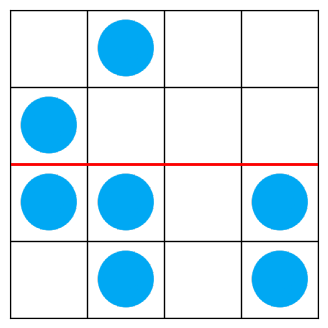

In [3]:
# Regla 1: al menos un círculo
A1 = reglas[0]
S1 = tseitin(A1)
t0 = time.time()
res1 = WalkSAT(S1)
t1 = time.time()
print('Regla 1 - SAT:', res1, 'Tiempo(s):', round(t1-t0,6))
if res1 is not None and res1[0] == 'Satisfacible':
    p.visualizar(res1[1])

Regla 2 - SAT: ('Satisfacible', {'ď': True, 'ă': False, 'Ċ': False, 'ā': True, 'č': True, 'ċ': True, 'Ā': False, 'ą': False, 'ĉ': True, 'Č': False, 'Ă': True, 'ć': False, 'Ď': False, 'Ĉ': True, 'Ą': False, 'Ć': True}) Tiempo(s): 0.006762


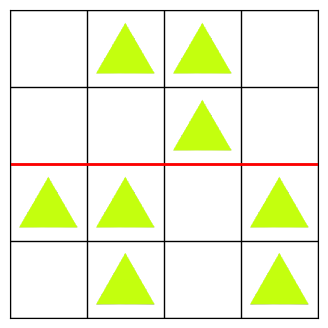

In [4]:
# Regla 2: al menos un triángulo
A2 = reglas[1]
S2 = tseitin(A2)
t0 = time.time()
res2 = WalkSAT(S2)
t1 = time.time()
print('Regla 2 - SAT:', res2, 'Tiempo(s):', round(t1-t0,6))
if res2 is not None and res2[0] == 'Satisfacible':
    p.visualizar(res2[1])

Regla 3 - SAT: ('Satisfacible', {'ğ': False, 'ĕ': False, 'Ė': True, 'Ę': False, 'Ĕ': False, 'Ĝ': False, 'ė': False, 'ĝ': False, 'ē': False, 'đ': True, 'Ě': True, 'Ğ': True, 'Ē': True, 'ě': True, 'Đ': False, 'ę': True}) Tiempo(s): 0.0025


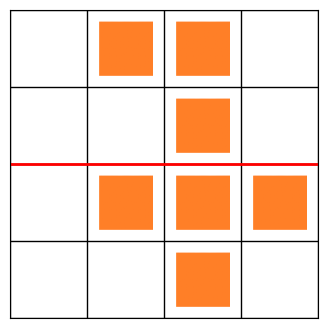

In [5]:
# Regla 3: al menos un cuadrado
A3 = reglas[2]
S3 = tseitin(A3)
t0 = time.time()
res3 = WalkSAT(S3)
t1 = time.time()
print('Regla 3 - SAT:', res3, 'Tiempo(s):', round(t1-t0,6))
if res3 is not None and res3[0] == 'Satisfacible':
    p.visualizar(res3[1])

Regla 4 - SAT: ('Satisfacible', {'ā': False, 'ċ': False, 'ė': True, 'Ĝ': True, 'Ĥ': True, 'ġ': False, 'Č': False, 'ć': False, 'Ď': False, 'ē': False, 'Ć': False, 'č': True, 'Ā': False, 'Ę': True, 'ĭ': True, 'ą': True, 'Ĭ': True, 'ĩ': False, 'Ģ': False, 'Ĩ': False, 'ĥ': False, 'Ĉ': True, 'ě': False, 'Đ': False, 'Ą': False, 'ď': True, 'ă': False, 'ī': False, 'ĕ': True, 'Į': False, 'Ĕ': True, 'ĉ': False, 'đ': False, 'Ğ': False, 'Ġ': False, 'ģ': True, 'į': True, 'ę': True, 'ğ': False, 'Ī': True, 'Ċ': False, 'Ė': False, 'ħ': True, 'ĝ': False, 'Ă': False, 'Ħ': True, 'Ě': False, 'Ē': False}) Tiempo(s): 0.043821


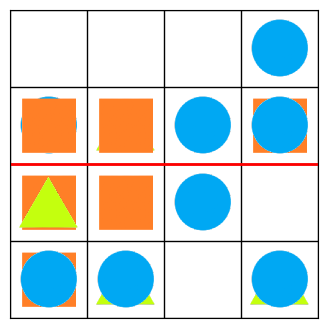

In [6]:
# Regla 4: no filas vacías
A4 = reglas[3]
S4 = tseitin(A4)
t0 = time.time()
res4 = WalkSAT(S4)
t1 = time.time()
print('Regla 4 - SAT:', res4, 'Tiempo(s):', round(t1-t0,6))
if res4 is not None and res4[0] == 'Satisfacible':
    p.visualizar(res4[1])

Regla 5 - SAT: ('Satisfacible', {'ā': True, 'ċ': False, 'ė': False, 'Ĝ': False, 'Ĥ': True, 'ġ': False, 'Č': False, 'ć': False, 'Ď': True, 'ē': False, 'Ć': True, 'č': True, 'Ā': False, 'Ę': False, 'ĭ': False, 'ą': False, 'Ĭ': False, 'ĩ': False, 'Ģ': False, 'Ĩ': True, 'ĥ': False, 'Ĉ': True, 'ě': False, 'Đ': False, 'Ą': True, 'ď': False, 'ă': False, 'ī': False, 'ĕ': False, 'Į': False, 'Ĕ': False, 'ĉ': False, 'đ': True, 'Ğ': True, 'Ġ': False, 'ģ': False, 'į': False, 'ę': False, 'ğ': False, 'Ī': False, 'Ċ': True, 'Ė': False, 'ħ': False, 'ĝ': True, 'Ă': True, 'Ħ': False, 'Ě': False, 'Ē': True}) Tiempo(s): 10.609945


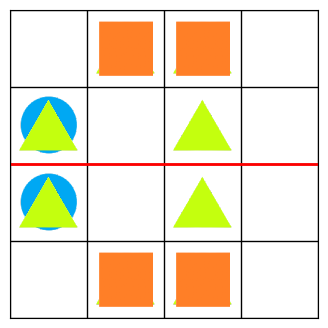

In [7]:
# Regla 5: simetría horizontal
A5 = reglas[4]
S5 = tseitin(A5)
t0 = time.time()
res5 = WalkSAT(S5)
t1 = time.time()
print('Regla 5 - SAT:', res5, 'Tiempo(s):', round(t1-t0,6))
if res5 is not None and res5[0] == 'Satisfacible':
    p.visualizar(res5[1])

Regla 6 - SAT: ('Satisfacible', {'ā': False, 'ċ': True, 'Ĝ': True, 'Ĥ': True, 'ė': False, 'ġ': False, 'Č': False, 'ć': True, 'Ď': False, 'ē': True, 'Ć': False, 'č': True, 'Ā': False, 'Ę': False, 'ĭ': False, 'ą': True, 'Ĭ': False, 'ĩ': True, 'Ģ': False, 'Ĩ': True, 'ĥ': False, 'Ĉ': False, 'ě': False, 'Đ': True, 'Ą': False, 'ď': False, 'ă': False, 'ī': False, 'ĕ': False, 'Į': True, 'Ĕ': False, 'ĉ': False, 'đ': True, 'Ğ': False, 'Ġ': False, 'ģ': False, 'į': False, 'ę': False, 'ğ': False, 'Ī': False, 'Ċ': True, 'Ė': True, 'ħ': False, 'ĝ': False, 'Ă': False, 'Ħ': False, 'Ě': False, 'Ē': True}) Tiempo(s): 22.069134


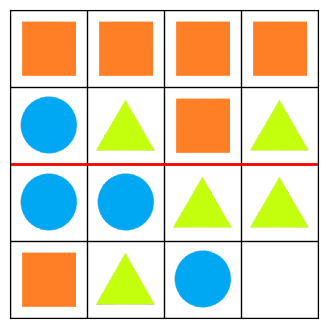

In [8]:
# Regla 6: solo una ficha por casilla
A6 = reglas[5]
S6 = tseitin(A6)
t0 = time.time()
res6 = WalkSAT(S6)
t1 = time.time()
print('Regla 6 - SAT:', res6, 'Tiempo(s):', round(t1-t0,6))
if res6 is not None and res6[0] == 'Satisfacible':
    p.visualizar(res6[1])

In [ ]:
# Regla 7: no repetición de la misma figura en una fila
A7 = reglas[6]
S7 = tseitin(A7)
t0 = time.time()
res7 = WalkSAT(S7)
t1 = time.time()
print('Regla 7 - SAT:', res7, 'Tiempo(s):', round(t1-t0,6))
if res7 is not None and res7[0] == 'Satisfacible':
    p.visualizar(res7[1])

## 2) Conjunciones progresivas de reglas
Probamos todas las combinaciones progresivas de reglas (1+2, 1+2+3, 1-4, 1-5, 1-6, 1-7).
Se usa conjunción lógica (`Y`) entre las reglas para forzar que todas se cumplan simultáneamente.

In [ ]:
# Combinación 1+2
from Archivos.Logica import Ytoria
comb_12 = Ytoria([reglas[0], reglas[1]])
S_12 = tseitin(comb_12)
t0 = time.time()
res_12 = WalkSAT(S_12)
t1 = time.time()
print('1+2 - SAT:', res_12, 'Tiempo(s):', round(t1-t0,6))
if res_12 is not None and res_12[0] == 'Satisfacible':
    p.visualizar(res_12[1])

In [ ]:
# Combinación 1+2+3
comb_123 = Ytoria([reglas[0], reglas[1], reglas[2]])
S_123 = tseitin(comb_123)
t0 = time.time()
res_123 = WalkSAT(S_123)
t1 = time.time()
print('1+2+3 - SAT:', res_123, 'Tiempo(s):', round(t1-t0,6))
if res_123 is not None and res_123[0] == 'Satisfacible':
    p.visualizar(res_123[1])

In [ ]:
# Combinación 1-4 (1..4)
comb_1_4 = Ytoria([reglas[0], reglas[1], reglas[2], reglas[3]])
S_1_4 = tseitin(comb_1_4)
t0 = time.time()
res_1_4 = WalkSAT(S_1_4)
t1 = time.time()
print('1-4 - SAT:', res_1_4, 'Tiempo(s):', round(t1-t0,6))
if res_1_4 is not None and res_1_4[0] == 'Satisfacible':
    p.visualizar(res_1_4[1])

In [ ]:
# Combinación 1-5 (1..5)
comb_1_5 = Ytoria([reglas[0], reglas[1], reglas[2], reglas[3], reglas[4]])
S_1_5 = tseitin(comb_1_5)
t0 = time.time()
res_1_5 = WalkSAT(S_1_5)
t1 = time.time()
print('1-5 - SAT:', res_1_5, 'Tiempo(s):', round(t1-t0,6))
if res_1_5 is not None and res_1_5[0] == 'Satisfacible':
    p.visualizar(res_1_5[1])

In [ ]:
# Combinación 1-6 (1..6)
comb_1_6 = Ytoria([reglas[0], reglas[1], reglas[2], reglas[3], reglas[4], reglas[5]])
S_1_6 = tseitin(comb_1_6)
t0 = time.time()
res_1_6 = WalkSAT(S_1_6)
t1 = time.time()
print('1-6 - SAT:', res_1_6, 'Tiempo(s):', round(t1-t0,6))
if res_1_6 is not None and res_1_6[0] == 'Satisfacible':
    p.visualizar(res_1_6[1])

In [ ]:
# Combinación 1-7 (todas)
comb_1_7 = Ytoria(reglas)
S_1_7 = tseitin(comb_1_7)
t0 = time.time()
res_1_7 = WalkSAT(S_1_7)
t1 = time.time()
print('1-7 - SAT:', res_1_7, 'Tiempo(s):', round(t1-t0,6))
if res_1_7 is not None and res_1_7[0] == 'Satisfacible':
    p.visualizar(res_1_7[1])

## 3) Resultado completo (Reglas 1-7)
Ejecutamos WalkSAT sobre la conjunción de todas las reglas y mostramos el tiempo y la visualización final.

In [ ]:
all_formula = Ytoria(reglas)
S_all = tseitin(all_formula)
t0 = time.time()
res_all = WalkSAT(S_all)
t1 = time.time()
print('Todas las reglas: SAT=', res_all, 'Tiempo(s)=', round(t1-t0,6))
if res_all is not None and res_all[0] == 'Satisfacible':
    try:
        p.visualizar(res_all[1])
    except Exception as e:
        print('Error al visualizar la solución completa:', e)

## 4) Análisis de resultados
Compara los tiempos obtenidos y observa cómo las restricciones adicionales afectan la dificultad del problema.

- WalkSAT es rápido para muchas instancias, pero puede fallar en encontrar solución si la instancia es difícil.
- El resultado puede variar entre ejecuciones debido a su naturaleza aleatoria.

### Notas prácticas:
- Si alguna combinación tarda demasiado o no encuentra solución, prueba con menos reglas o ajusta los parámetros de WalkSAT.
- Este notebook permite validar la semántica de las reglas y obtener modelos de referencia usando WalkSAT.